# Detecting Facial Expressions Through Deep Learning Techniques.
Facial expression detection using deep learning is a cutting-edge field at the intersection of computer vision and artificial intelligence. It involves training deep learning models, such as convolutional neural networks (CNNs), on large datasets of labeled facial images to recognize and interpret human facial expressions. These models learn to identify distinct patterns corresponding to various emotions like happiness, sadness, anger, and more.

The steps we will follow are:

1. Understanding the Application Domain.
2. Analyzing the Data Characteristics.
3. Pre-processing the Data.
4. Justifying the choice of Deep Learning.
5. Evaluating the model.

# Importing Libraries

In [3]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

## 1. Application Domain
The application domain of facial expression detection using deep learning spans several industries and fields. In the automobile industry, Monitoring the driver's facial expressions and head position to detect signs of fatigue, drowsiness, or distraction. If such signs are detected, the system can alert the driver or even take corrective actions like slowing down the vehicle.

## 2. Data Characteristics

The dataset used for the classification consists of various images for each class like Angry, Disgust, Fear, Happy, Neutral, Sad, Surprise. 
Load both training images and testing images for the model.

In [5]:
train_directory = r"C:\Users\saisa\OneDrive\Desktop\DSP\Project\dataset\train" 
test_directory = r"C:\Users\saisa\OneDrive\Desktop\DSP\Project\dataset\test"   

In [8]:
datagenerator_train = ImageDataGenerator(#rotation_range = 180,
                                         width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         #zoom_range = 0.2,
                                         validation_split = 0.2
                                        )
datagenerator_test = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)

## 3. Data Preprocessing
Data preprocessing involves resizing all images to a uniform dimension and randomly dividing the dataset into training and test subsets to ensure the model's ability to generalize and validate its performance effectively.

In [9]:


train_generator = datagenerator_train.flow_from_directory(directory = train_directory,
                                                    target_size = (48,48),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator = datagenerator_test.flow_from_directory( directory = test_directory,
                                                              target_size = (48,48),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


## 4. Justification for choosing the Deep Learning Model

Deep learning models, particularly Convolutional Neural Networks (CNNs), excel at image analysis due to their hierarchical feature extraction process. They can learn intricate features from raw pixel data, making them highly effective for tasks like facial expression recognition where subtleties in facial features are crucial.

## CNN Model

In [10]:
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

model.compile(
    optimizer = Adam(lr=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

In [34]:
batch_size = 4

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       2

In [14]:
model.save('model_optimal.h5')

C:\Users\saisa\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [36]:
history = model.fit(x = train_generator,epochs = 30,validation_data = validation_generator)
test_loss, test_acc   = model.evaluate(validation_generator)
print(f"accuracy : {test_acc}")

Epoch 1/30
359/359 [==============================] - 2346s 7s/step - loss: 1.3716 - accuracy: 0.6108 - val_loss: 1.3296 - val_accuracy: 0.6278
Epoch 2/30
359/359 [==============================] - 749s 2s/step - loss: 1.3996 - accuracy: 0.6132 - val_loss: 1.3501 - val_accuracy: 0.6320
Epoch 3/30
359/359 [==============================] - 43980s 123s/step - loss: 1.3786 - accuracy: 0.6143 - val_loss: 1.3460 - val_accuracy: 0.6166
Epoch 4/30
359/359 [==============================] - 762s 2s/step - loss: 1.3603 - accuracy: 0.6129 - val_loss: 1.3567 - val_accuracy: 0.6166
Epoch 5/30
359/359 [==============================] - 578s 2s/step - loss: 1.3480 - accuracy: 0.6162 - val_loss: 1.3621 - val_accuracy: 0.6194
Epoch 6/30
359/359 [==============================] - 665s 2s/step - loss: 1.3412 - accuracy: 0.6188 - val_loss: 1.4019 - val_accuracy: 0.6250
Epoch 7/30
359/359 [==============================] - 590s 2s/step - loss: 1.3433 - accuracy: 0.6169 - val_loss: 1.3121 - val_accuracy: 0

# Testing the model

In [40]:
def emotion_analysis(emotions):
    objects = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
    y_pos = np.arange(len(objects))
    plt.bar(y_pos, emotions, align='center', alpha=0.9)
    plt.tick_params(axis='x', which='both', pad=10,width=4,length=10)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
plt.show()

1/1 [==============================] - 0s 71ms/step


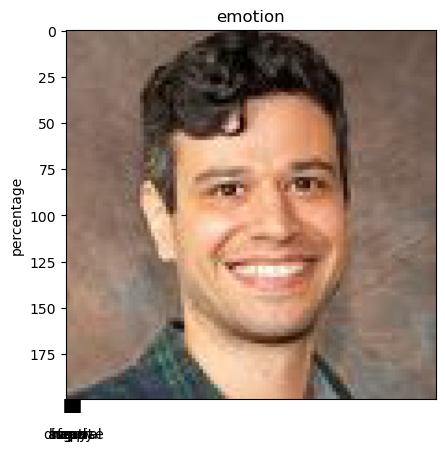

Expression Prediction: happy


In [48]:
from skimage import io
img = image.load_img(r"C:\Users\saisa\OneDrive\Desktop\DSP\Project\dataset\test\test.jpeg", grayscale=True, target_size=(48, 48))
show_img=image.load_img(r"C:\Users\saisa\OneDrive\Desktop\DSP\Project\dataset\test\test.jpeg", grayscale=False, target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(show_img)
plt.show()
objects = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i
        
print('Expression Prediction:',objects[ind])

In [39]:
model.save_weights('model_weights.h5')